In [48]:
%matplotlib inline
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
import scipy.constants as cs

In [49]:
import uncertainties
from uncertainties import ufloat

Fit the peaks from the hydrogen and deuterium lines, and determine the
line centers. From these numbers, you should be able to calculate the ratio of the electron mass
to the nucleon mass.

# Load and present data: Alpha lines for hydrogen and deuterium

In [50]:
filename = 'ALPHA_HD.txt'
wavelength, voltage= np.loadtxt(filename,skiprows=1,unpack=True) #The function should automatically deal with a delimiter.
wavelength_index, voltage= np.loadtxt(filename,skiprows=1,unpack=True) #The function should automatically deal with a delimiter.

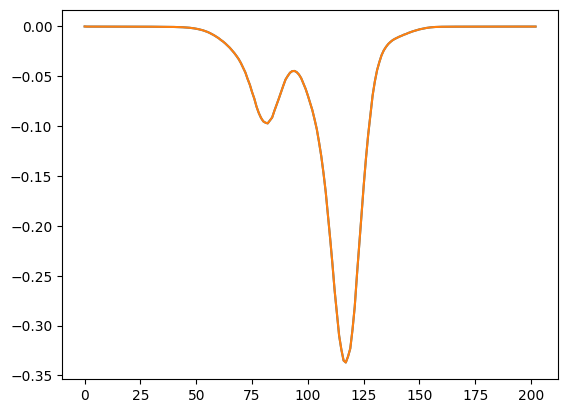

In [51]:
fig,ax = plt.subplots()
ax.plot(wavelength, voltage)
ax.plot(wavelength_index, voltage)

Yay we have the data! The next step is to properly label the axes. The y-axis is in volts while the x-axis was in whatever units that the instrument was in, but we want to convert it into wavelength. 

In our data collection we had started from 13100 to 13130 in increments of 0.10. In order to convert into nanometers, we would be dividing these values by 20. 

In [52]:
START_STEP = 13100
STEP_SIZE = 0.1

print(wavelength_index)
spectrometer_value = START_STEP + (wavelength_index*STEP_SIZE)
print(spectrometer_value)
wavelength = spectrometer_value / 20
print(wavelength)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

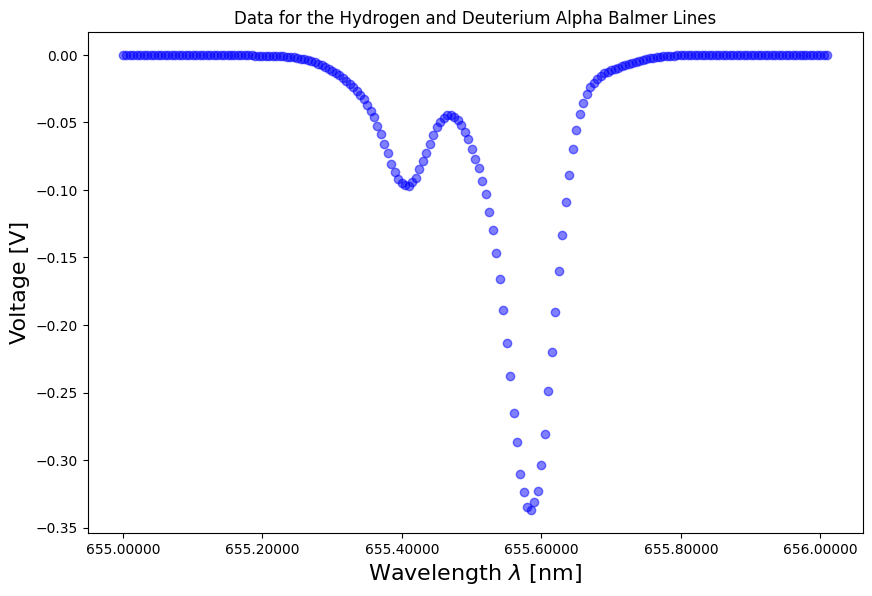

In [53]:
#Make a figure a bit bigger:
fig,ax = plt.subplots(figsize=(10,6.5))

# Turn the frequency data into GHz by dividing by 1e9, and use blue circular markers ('bo'):
ax.plot(wavelength, voltage,'bo',alpha=0.5) # alpha = 0.5 sets the opacity of the markers

#Labels using latex:
ax.set_ylabel(r'Voltage [V]',size=16)
ax.set_xlabel(r'Wavelength $\lambda$ [nm]',size=16) #The r before the string sets to math mode
plt.title("Data for the Hydrogen and Deuterium Alpha Balmer Lines")

#Format x-axis:
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.5f'))

#Show the plot:
plt.show()

## Determine the peak wavelengths and their uncertainties. Include residual plots. 

### Double Gaussian

If this were a perfect world, we would expect to see 2 dirac delta functions (or 7). But of course the world is not perfect. Thus, our best way to go is to first try to fit 2 Gaussians to find the 2 peak wavelengths of the Hydrogenn and Deuterium alpha lines. 

\\[
f(\lambda) = A_1 e^{-\frac{(\lambda - \mu_1)^2}{2\sigma_1^2}} + A_2 e^{-\frac{(\lambda - \mu_2)^2}{2\sigma_2^2}}
\\]

In [54]:
# Define the double Gaussian function
def double_gaussian(x, A1, mu1, sigma1, A2, mu2, sigma2):
    return A1 * np.exp(-((x - mu1)**2) / (2 * sigma1**2)) + A2 * np.exp(-((x - mu2)**2) / (2 * sigma2**2))

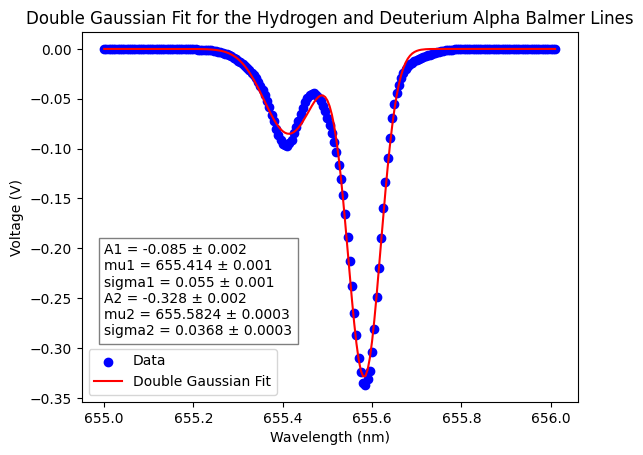

In [55]:
# Initial guesses for [A1, mu1, sigma1, A2, mu2, sigma2]
initial_guess = [-0.1, 655.4, 0.5, -0.3, 655.6, 0.1]

# Fit the data
params, covariance = curve_fit(double_gaussian, wavelength, voltage, p0=initial_guess)

# Extract parameters and uncertainties
A1, mu1, sigma1, A2, mu2, sigma2 = params
uncertainties = np.sqrt(np.diag(covariance))

# Create a formatted string for the fitted parameters and uncertainties
fit_label = (
    f"A1 = {A1:.3f} ± {uncertainties[0]:.3f}\n"
    f"mu1 = {mu1:.3f} ± {uncertainties[1]:.3f}\n"
    f"sigma1 = {sigma1:.3f} ± {uncertainties[2]:.3f}\n"
    f"A2 = {A2:.3f} ± {uncertainties[3]:.3f}\n"
    f"mu2 = {mu2:.4f} ± {uncertainties[4]:.4f}\n"
    f"sigma2 = {sigma2:.4f} ± {uncertainties[5]:.4f}"
)
plt.text(655, min(voltage) + 0.05, fit_label, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# Plot the fit
plt.scatter(wavelength, voltage, label='Data', color='blue')
plt.plot(wavelength, double_gaussian(wavelength, *params), label='Double Gaussian Fit', color='red')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Voltage (V)")
plt.title("Double Gaussian Fit for the Hydrogen and Deuterium Alpha Balmer Lines")
plt.legend()
plt.show()

In [56]:
# uGaussian = uncertainties.correlated_values(params, covariance)
# Extract uncertainties (square root of diagonal elements of the covariance matrix)
uncertainties = np.sqrt(np.diag(covariance))

# Combine parameters with their uncertainties into ufloats
A1, mu1, sigma1, A2, mu2, sigma2 = [ufloat(param, uncertainty) for param, uncertainty in zip(params, uncertainties)]

In [57]:
print(f'{A1:S}')

-0.0851(17)


In [58]:
print(f'{mu1:S}')

655.4136(13)


In [59]:
print(f'{sigma1:S}')

0.0552(15)


In [60]:
print(f'{A2:S}')

-0.3283(20)


In [61]:
print(f'{mu2:S}')

655.58244(29)


In [62]:
print(f'{sigma2:S}')

0.03681(30)


In [63]:
(mu2-mu1)/mu2

0.0002575539577751176+/-2.0900198676473145e-06

#### Determining uncertainties for the Double Gaussian

In [64]:
# Print the fitting parameter and its statistical uncertainty in pairs.
print("Fit parameters with statistical uncertainties:\n")
print([[params[nn],np.sqrt(covariance[nn,nn])] for nn in range(len(params))])

Fit parameters with statistical uncertainties:

[[np.float64(-0.08512176344056724), np.float64(0.0016879167694601705)], [np.float64(655.4135928603675), np.float64(0.0013394449955185937)], [np.float64(0.05519840333215319), np.float64(0.0014628274120162324)], [np.float64(-0.32827120839792157), np.float64(0.0020210001762384524)], [np.float64(655.582440712621), np.float64(0.0002886592195914728)], [np.float64(0.03681218216779087), np.float64(0.0002966945386631109)]]


In [65]:
print(fit_label)

A1 = -0.085 ± 0.002
mu1 = 655.414 ± 0.001
sigma1 = 0.055 ± 0.001
A2 = -0.328 ± 0.002
mu2 = 655.5824 ± 0.0003
sigma2 = 0.0368 ± 0.0003


#### Residuals for the Double Gaussian

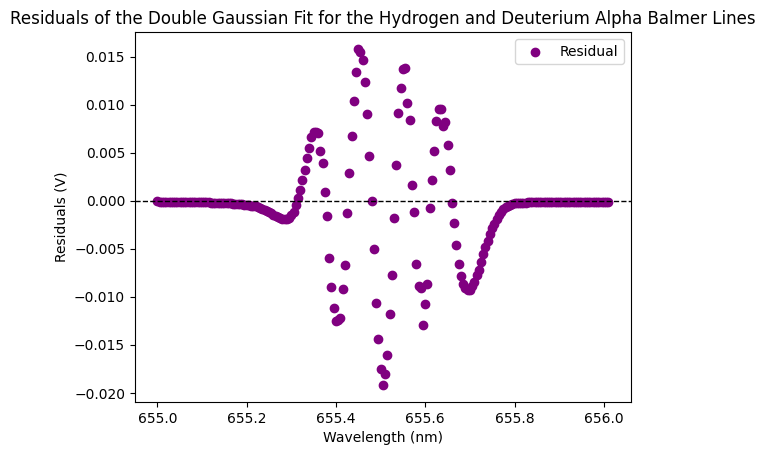

In [66]:
# Compute the fitted values
fitted_values = double_gaussian(wavelength, *params)

# Compute the residuals (observed - fitted)
residuals = voltage - fitted_values

# Plot the residuals
plt.scatter(wavelength, residuals, color='purple', label='Residual')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Add a horizontal line at 0 for reference
plt.xlabel("Wavelength (nm)")
plt.ylabel("Residuals (V)")
plt.title("Residuals of the Double Gaussian Fit for the Hydrogen and Deuterium Alpha Balmer Lines")
plt.legend()
plt.show()

#### Double Gaussian -> electron to proton mass ratio

\\[
    \Delta \lambda_n = \lambda_n^H - \lambda_n^D = \lambda_n m_e \left( \frac{1}{M_P} - \frac{1}{M_D} \right) = \lambda_n \frac{m_e}{M_P} \left( 1 - \frac{M_P}{M_D} \right)
    \\]

\\[
\frac{m_e}{M_P} \approx \frac{\Delta \lambda_n}{\lambda_n} \cdot \frac{1}{1 - \frac{M_P}{M_D}}
\\]
where 
\\[
\frac{M_P}{M_D} \approx \frac{1}{2} + 2.5 \cdot 10^{-4}
\\]

In [67]:
# Question: which peak is the Hydrogen peak and which is the deuterium? Since we know that there is much less deuterium than hydrogen, 
# we can assume that the lower intensity voltage peak corresponds to the deuterium peak. 
# Also from our prelab calculations we know that the lower wavelength peak corresponds to deuterium and the higher wavelength peak 
# corresponds to hydrogen. 

In [68]:
# since we are doing ratios, we can keep the wavelengths in nanometers
def calculate_ep_ratio(lambdaD, lambdaH):
    mpmd_ratio = 0.5 + 2.5*10**(-4)
    return abs(lambdaH-lambdaD)/lambdaH*1/(1-mpmd_ratio)

In [69]:
# How do we calculate the uncertainty of the ratio? 

In [70]:
double_gaussian_ratio = calculate_ep_ratio(655.414,655.5824)
print(double_gaussian_ratio)

0.0005139986739152246


In [71]:
1/1836

0.0005446623093681918

In [72]:
double_gaussian_ratio = calculate_ep_ratio(mu2, mu1)
print(f'{double_gaussian_ratio:S}')

0.000515(4)


In [73]:
# Extract uncertainties (square root of diagonal elements of the covariance matrix)
uncertainties = np.sqrt(np.diag(covariance))
# Combine parameters with their uncertainties into ufloats
A1, mu1, sigma1, A2, mu2, sigma2 = [ufloat(param, uncertainty) for param, uncertainty in zip(params, uncertainties)]

double_gaussian_ratio = calculate_ep_ratio(mu2, mu1)
print(f'{double_gaussian_ratio:S}')

0.000515(4)


### Double Lorentzian

The Lorentz distribution function is given by: 

\\[
L(x) = \frac{1}{\pi} \frac{\frac{1}{2} \Gamma}{(x - x_0)^2 + \left(\frac{1}{2} \Gamma\right)^2}
\\] 
where $\Gamma$ represents the FWHM. 

The double lorentzian can be repressented by: 
\\[
L(x) = \frac{A_1}{\pi} \frac{\frac{1}{2} \Gamma_1}{(x - x_1)^2 + \left(\frac{1}{2} \Gamma_1\right)^2} + \frac{A_2}{\pi} \frac{\frac{1}{2} \Gamma_2}{(x - x_2)^2 + \left(\frac{1}{2} \Gamma_2\right)^2}
\\] 

In [74]:
def double_lorentzian(x, A1, x1, G1, A2, x2, G2):
    """
    Compute the double Lorentzian function.

    Parameters:
    x (array-like): Independent variable (e.g., wavelength or position).
    A1 (float): Amplitude of the first Lorentzian.
    G1 (float): FWHM of the first Lorentzian.
    x1 (float): Center of the first Lorentzian.
    A2 (float): Amplitude of the second Lorentzian.
    G2 (float): FWHM of the second Lorentzian.
    x2 (float): Center of the second Lorentzian.

    Returns:
    array-like: Double Lorentzian values for input `x`.
    """
    L1 = A1*(G1/2) / (np.pi * ((x - x1)**2 + (G1 / 2)**2))
    L2 = A2*(G2/2) / (np.pi * ((x - x2)**2 + (G2 / 2)**2))
    return L1 + L2

[655.    655.005 655.01  655.015 655.02  655.025 655.03  655.035 655.04
 655.045 655.05  655.055 655.06  655.065 655.07  655.075 655.08  655.085
 655.09  655.095 655.1   655.105 655.11  655.115 655.12  655.125 655.13
 655.135 655.14  655.145 655.15  655.155 655.16  655.165 655.17  655.175
 655.18  655.185 655.19  655.195 655.2   655.205 655.21  655.215 655.22
 655.225 655.23  655.235 655.24  655.245 655.25  655.255 655.26  655.265
 655.27  655.275 655.28  655.285 655.29  655.295 655.3   655.305 655.31
 655.315 655.32  655.325 655.33  655.335 655.34  655.345 655.35  655.355
 655.36  655.365 655.37  655.375 655.38  655.385 655.39  655.395 655.4
 655.405 655.41  655.415 655.42  655.425 655.43  655.435 655.44  655.445
 655.45  655.455 655.46  655.465 655.47  655.475 655.48  655.485 655.49
 655.495 655.5   655.505 655.51  655.515 655.52  655.525 655.53  655.535
 655.54  655.545 655.55  655.555 655.56  655.565 655.57  655.575 655.58
 655.585 655.59  655.595 655.6   655.605 655.61  655.615 65

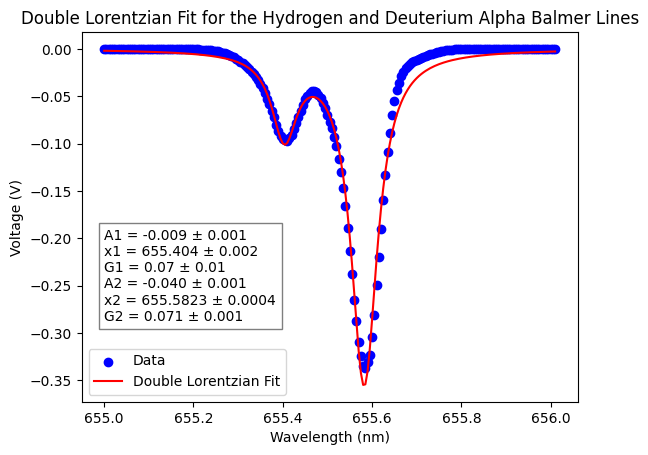

In [75]:
# Initial guesses for [A1, x1, G1, A2, x2, G2]
initial_guess = [-0.1, 655.4, 0.1, -0.3, 655.6, 0.1]

# Fit the data
params, covariance = curve_fit(double_lorentzian, wavelength, voltage, p0=initial_guess)
print(wavelength)
print(voltage)

# Extract parameters and uncertainties
A1, x1, G1, A2, x2, G2 = params
uncertainties = np.sqrt(np.diag(covariance))

# Create a formatted string for the fitted parameters and uncertainties
fit_label = (
    f"A1 = {A1:.3f} ± {uncertainties[0]:.3f}\n"
    f"x1 = {x1:.3f} ± {uncertainties[1]:.3f}\n"
    f"G1 = {G1:.2f} ± {uncertainties[2]:.2f}\n"
    f"A2 = {A2:.3f} ± {uncertainties[3]:.3f}\n"
    f"x2 = {x2:.4f} ± {uncertainties[4]:.4f}\n"
    f"G2 = {G2:.3f} ± {uncertainties[5]:.3f}"
)
plt.text(655, min(voltage) + 0.05, fit_label, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# Plot the fit
plt.scatter(wavelength, voltage, label='Data', color='blue')
plt.plot(wavelength, double_lorentzian(wavelength, *params), label='Double Lorentzian Fit', color='red')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Voltage (V)")
plt.title("Double Lorentzian Fit for the Hydrogen and Deuterium Alpha Balmer Lines")
plt.legend()
plt.show()

#### Determining uncertainties for the Double Lorentzian

In [76]:
# Print the fitting parameter and its statistical uncertainty in pairs.
print("Fit parameters with statistical uncertainties:\n")
print([[params[nn],np.sqrt(covariance[nn,nn])] for nn in range(len(params))])

Fit parameters with statistical uncertainties:

[[np.float64(-0.009440981962283768), np.float64(0.0005108615047857348)], [np.float64(655.4036587125264), np.float64(0.0016807465147885682)], [np.float64(0.06856252975278071), np.float64(0.0050547613607567835)], [np.float64(-0.0395474916449928), np.float64(0.0005205578321383917)], [np.float64(655.5823282729335), np.float64(0.0004255319135913505)], [np.float64(0.071287869848417), np.float64(0.0012800789803447017)]]


In [77]:
print(fit_label)

A1 = -0.009 ± 0.001
x1 = 655.404 ± 0.002
G1 = 0.07 ± 0.01
A2 = -0.040 ± 0.001
x2 = 655.5823 ± 0.0004
G2 = 0.071 ± 0.001


#### Residuals for the Double Lorentzian

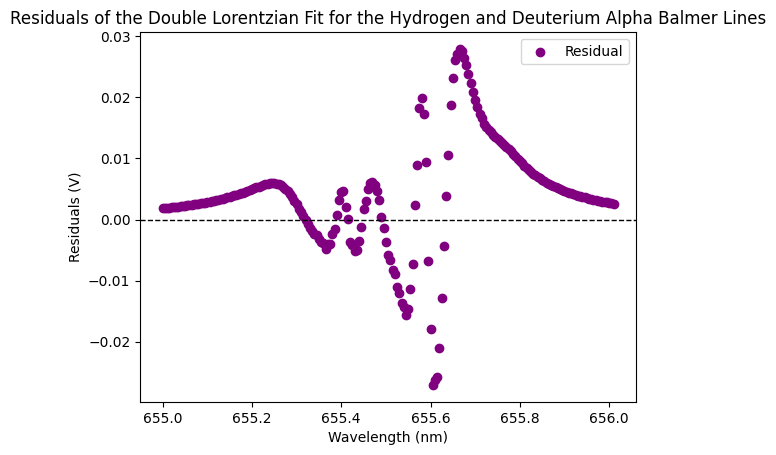

In [78]:
# Compute the fitted values
fitted_values = double_lorentzian(wavelength, *params)

# Compute the residuals (observed - fitted)
residuals = voltage - fitted_values

# Plot the residuals
plt.scatter(wavelength, residuals, color='purple', label='Residual')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Add a horizontal line at 0 for reference
plt.xlabel("Wavelength (nm)")
plt.ylabel("Residuals (V)")
plt.title("Residuals of the Double Lorentzian Fit for the Hydrogen and Deuterium Alpha Balmer Lines")
plt.legend()
plt.show()

In [79]:
double_lorentzian_ratio = calculate_ep_ratio(655.404,655.5823)
print(double_lorentzian_ratio)

0.0005442160186366664


In [80]:
1/1836

0.0005446623093681918

In [81]:
# Extract uncertainties (square root of diagonal elements of the covariance matrix)
uncertainties = np.sqrt(np.diag(covariance))
# Combine parameters with their uncertainties into ufloats
A1, mu1, sigma1, A2, mu2, sigma2 = [ufloat(param, uncertainty) for param, uncertainty in zip(params, uncertainties)]

double_lorentzian_ratio = calculate_ep_ratio(mu2, mu1)
print(f'{double_lorentzian_ratio:S}')

0.000545(5)


### Double Voigt

\\[
V(x) = \frac{A_1}{\sigma_1 \sqrt{2\pi}} \operatorname{Re} \left( w \left( \frac{x - x_1 + iG_1}{\sigma_1 \sqrt{2}} \right) \right) + \frac{A_2}{\sigma_2 \sqrt{2\pi}} \operatorname{Re} \left( w \left( \frac{x - x_2 + iG_2}{\sigma_2 \sqrt{2}} \right) \right)
\\]

In [82]:
from scipy.special import wofz

def double_voigt(x, A1, x1, sigma1, G1, A2, x2, sigma2, G2):
    """
    Voigt profile function.
    
    Parameters:
    x (array-like): Independent variable (e.g., wavelength).
    A (float): Amplitude of the peak.
    xi (float): Center of the peak.
    sigma (float): Standard deviation of the Gaussian component.
    Gi (float): Full-width at half-maximum of the Lorentzian component.
    
    Returns:
    array-like: Voigt profile values for the given x.
    """
    z1 = A1 * np.real(wofz((x - x1 + 1j*G1)/sigma1/np.sqrt(2))) / (sigma1*np.sqrt(2*np.pi))
    z2 = A2 * np.real(wofz((x - x2  + 1j*G2)/sigma2/np.sqrt(2))) / (sigma2*np.sqrt(2*np.pi))
    return z1 + z2

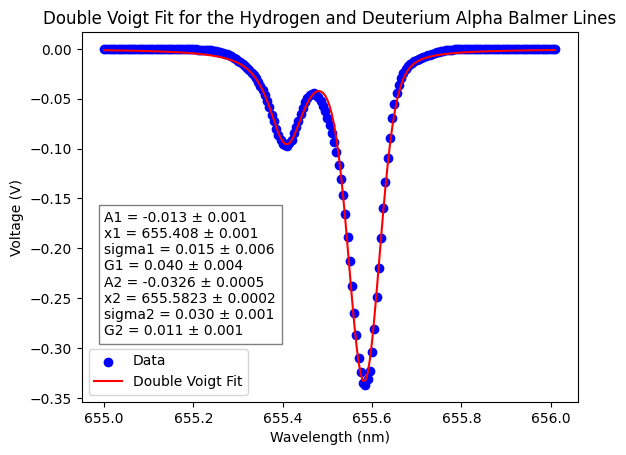

In [83]:
# A1, x1, sigma1, G1, A2, x2, sigma2, G2
initial_guess = [-0.01, 655.4, 0.04, 0.04, -0.4, 655.58, 0.05,0.05]

# Fit the data
params, covariance = curve_fit(double_voigt, wavelength, voltage, p0=initial_guess)

# Extract parameters and uncertainties
A1, x1, sigma1, G1, A2, x2, sigma2, G2 = params
uncertainties = np.sqrt(np.diag(covariance))

# Create a formatted string for the fitted parameters and uncertainties
fit_label = (
    f"A1 = {A1:.3f} ± {uncertainties[0]:.3f}\n"
    f"x1 = {x1:.3f} ± {uncertainties[1]:.3f}\n"
    f"sigma1 = {sigma1:.3f} ± {uncertainties[2]:.3f}\n"
    # f"sigma1 = {sigma1:.3f} ± {uncertainties[2]:.3f}\n"
    f"G1 = {G1:.3f} ± {uncertainties[3]:.3f}\n"
    f"A2 = {A2:.4f} ± {uncertainties[4]:.4f}\n"
    f"x2 = {x2:.4f} ± {uncertainties[5]:.4f}\n"
    f"sigma2 = {sigma2:.3f} ± {uncertainties[6]:.3f}\n" 
    # f"sigma2 = {sigma2:.2f} ± 20.\n"
    f"G2 = {G2:.3f} ± {uncertainties[7]:.3f}"
)
plt.text(655, min(voltage) + 0.05, fit_label, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# Plot the fit
plt.scatter(wavelength, voltage, label='Data', color='blue')
plt.plot(wavelength, double_voigt(wavelength, *params), label='Double Voigt Fit', color='red')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Voltage (V)")
plt.title("Double Voigt Fit for the Hydrogen and Deuterium Alpha Balmer Lines")
plt.legend()
plt.show()

#### Determining uncertainties for the Double Voigt

In [84]:
# Print the fitting parameter and its statistical uncertainty in pairs.
print("Fit parameters with statistical uncertainties:\n")
print([[params[nn],np.sqrt(covariance[nn,nn])] for nn in range(len(params))])

Fit parameters with statistical uncertainties:

[[np.float64(-0.012718483123183542), np.float64(0.0005141053195225016)], [np.float64(655.4080651708148), np.float64(0.0010026831710132145)], [np.float64(0.014671792571691095), np.float64(0.00559707959823112)], [np.float64(0.03977749160352623), np.float64(0.00422884146423214)], [np.float64(-0.032638231435756414), np.float64(0.00046196654927232333)], [np.float64(655.5822634970577), np.float64(0.00023571191248689723)], [np.float64(0.03020381847585892), np.float64(0.0008318702797721522)], [np.float64(0.011164198650233667), np.float64(0.0013252577181441173)]]


In [85]:
print(fit_label)

A1 = -0.013 ± 0.001
x1 = 655.408 ± 0.001
sigma1 = 0.015 ± 0.006
G1 = 0.040 ± 0.004
A2 = -0.0326 ± 0.0005
x2 = 655.5823 ± 0.0002
sigma2 = 0.030 ± 0.001
G2 = 0.011 ± 0.001


A1 = -0.091(6)
x1 =  659.02(2)
sigma1 = 0(3) 
G1 = 0.35(3), 
A2 = -0.422(7),
x2 = 660.818(5), 
sigma2 = 0(20), 
G2 = 0.393(8)

#### Residuals for the Double Voigt

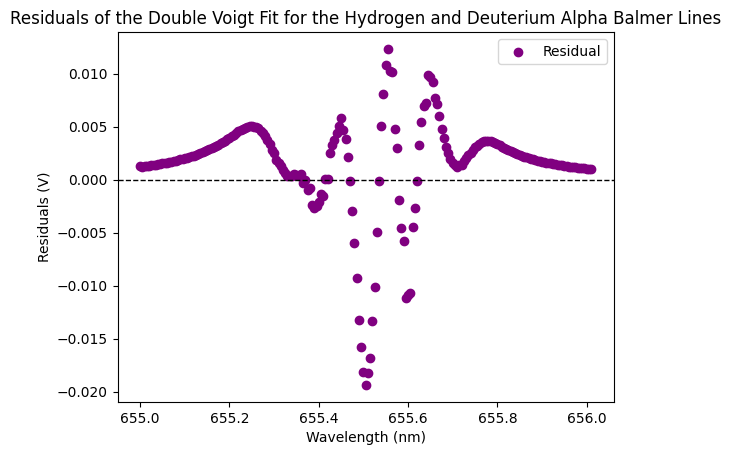

In [86]:
# Compute the fitted values
fitted_values = double_voigt(wavelength, *params)

# Compute the residuals (observed - fitted)
residuals = voltage - fitted_values

# Plot the residuals
plt.scatter(wavelength, residuals, color='purple', label='Residual')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Add a horizontal line at 0 for reference
plt.xlabel("Wavelength (nm)")
plt.ylabel("Residuals (V)")
plt.title("Residuals of the Double Voigt Fit for the Hydrogen and Deuterium Alpha Balmer Lines")
plt.legend()
plt.show()

In [87]:
double_voigt_ratio = calculate_ep_ratio(655.408,655.5823)
print(double_voigt_ratio)

0.0005320070221444812


In [88]:
# Extract uncertainties (square root of diagonal elements of the covariance matrix)
uncertainties = np.sqrt(np.diag(covariance))
# Combine parameters with their uncertainties into ufloats
A1, x1, sigma1, G1, A2, x2, sigma2, G2 = [ufloat(param, uncertainty) for param, uncertainty in zip(params, uncertainties)]

double_voigt_ratio = calculate_ep_ratio(mu2, mu1)
print(f'{double_voigt_ratio:S}')

0.000545(5)


# Plot Double Gaussian, Lorentzian, and Voigt graphs all on one graph

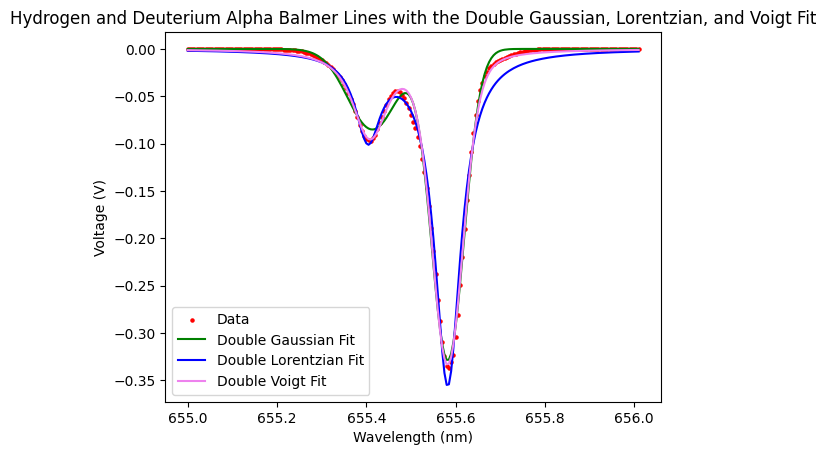

In [89]:
initial_guessG = [-0.1, 655.4, 0.5, -0.3, 655.6, 0.1]
initial_guessL = [-0.1, 655.4, 0.1, -0.3, 655.6, 0.1]
initial_guessV = [-0.01, 655.4, 0.04, 0.04, -0.4, 655.58, 0.05,0.05]

paramsG, covarianceG = curve_fit(double_gaussian, wavelength, voltage, p0=initial_guessG)
paramsL, covarianceL = curve_fit(double_lorentzian, wavelength, voltage, p0=initial_guessL)
paramsV, covarianceV = curve_fit(double_voigt, wavelength, voltage, p0=initial_guessV)

# Plot the fit
plt.scatter(wavelength, voltage, label='Data', color='red', s=5)
plt.plot(wavelength, double_gaussian(wavelength, *paramsG), label='Double Gaussian Fit', color='green')
plt.plot(wavelength, double_lorentzian(wavelength, *paramsL), label='Double Lorentzian Fit', color='blue')
plt.plot(wavelength, double_voigt(wavelength, *paramsV), label='Double Voigt Fit', color='violet')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Voltage (V)")
plt.title("Hydrogen and Deuterium Alpha Balmer Lines with the Double Gaussian, Lorentzian, and Voigt Fit")
plt.legend()
plt.show()

# Beta Lines

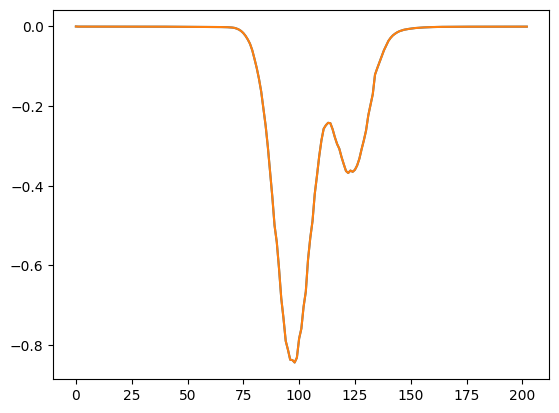

In [90]:
filename = 'day3_betaHD.txt'
wavelength, voltage= np.loadtxt(filename,skiprows=1,unpack=True) #The function should automatically deal with a delimiter.
wavelength_index, voltage= np.loadtxt(filename,skiprows=1,unpack=True) #The function should automatically deal with a delimiter.

fig,ax = plt.subplots()
ax.plot(wavelength, voltage)
ax.plot(wavelength_index, voltage)

In [91]:
START_STEP = 
STEP_SIZE = 0.1

print(wavelength_index)
spectrometer_value = START_STEP + (wavelength_index*STEP_SIZE)
print(spectrometer_value)
wavelength = spectrometer_value / 20
print(wavelength)

SyntaxError: invalid syntax (3029003434.py, line 1)